In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

get_ipython().magic('matplotlib inline')
sns.set(style='white', font_scale=0.9)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.color_palette(flatui)

np.set_printoptions(threshold=np.nan)
pd.set_option("display.max_columns",100)

In [12]:
dataset = pd.read_csv('HW2_pokemon.csv')

In [13]:
dataset.head(10)

,Unnamed: 0,Name,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Color,Height_m,Weight_kg,Body_Style
0,0,pokemon1,309,39,52,43,60,50,65,Red,0.61,8.5,bipedal_tailed
1,1,pokemon2,405,58,64,58,80,65,80,Red,1.09,19.0,bipedal_tailed
2,2,pokemon3,314,44,48,65,50,64,43,Blue,0.51,9.0,bipedal_tailed
3,3,pokemon4,405,59,63,80,65,80,58,Blue,0.99,22.5,bipedal_tailed
4,4,pokemon5,530,79,83,100,85,105,78,Blue,1.60,85.5,bipedal_tailed
5,5,pokemon6,195,45,30,35,20,20,45,Green,0.30,2.9,insectoid
6,6,pokemon7,205,50,20,55,25,25,30,Green,0.71,9.9,serpentine_body
7,7,pokemon8,253,30,56,35,25,35,72,Purple,0.30,3.5,quadruped
8,8,pokemon9,413,55,81,60,50,70,97,Brown,0.71,18.5,quadruped
9,9,pokemon10,288,35,60,44,40,54,55,Purple,2.01,6.9,serpentine_body


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 13 columns):
Unnamed: 0    368 non-null int64
Name          368 non-null object
Total         368 non-null int64
HP            368 non-null int64
Attack        368 non-null int64
Defense       368 non-null int64
Sp_Atk        368 non-null int64
Sp_Def        368 non-null int64
Speed         368 non-null int64
Color         368 non-null object
Height_m      368 non-null float64
Weight_kg     368 non-null float64
Body_Style    368 non-null object
dtypes: float64(2), int64(8), object(3)
memory usage: 37.5+ KB


In [15]:
# dataset['Total'] = dataset['Total'].fillna('None')

In [16]:
dataset_num = dataset[['Total','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed']]

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
dataset_num = sc_X.fit_transform(dataset_num)

In [19]:
dataset_scaled  = dataset.copy()
dataset_scaled[['Total','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed']] = dataset_num

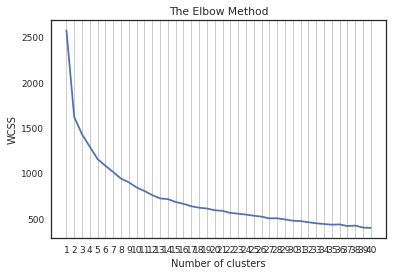

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 41):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_num)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 41), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 41, 1.0))
plt.grid(which='major', axis='x')
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset_num)

In [22]:
dataset['y_kmeans'] = y_kmeans

In [23]:
dataset.head()

,Unnamed: 0,Name,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Color,Height_m,Weight_kg,Body_Style,y_kmeans
0,0,pokemon1,309,39,52,43,60,50,65,Red,0.61,8.5,bipedal_tailed,1
1,1,pokemon2,405,58,64,58,80,65,80,Red,1.09,19.0,bipedal_tailed,0
2,2,pokemon3,314,44,48,65,50,64,43,Blue,0.51,9.0,bipedal_tailed,1
3,3,pokemon4,405,59,63,80,65,80,58,Blue,0.99,22.5,bipedal_tailed,0
4,4,pokemon5,530,79,83,100,85,105,78,Blue,1.60,85.5,bipedal_tailed,4


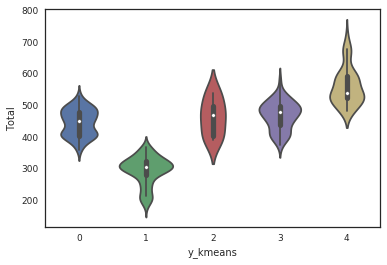

In [24]:
sns.violinplot(x='y_kmeans', y='Total', data=dataset)
plt.show()

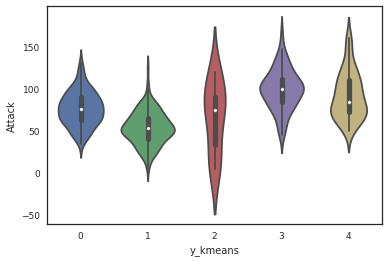

In [25]:
sns.violinplot(x='y_kmeans', y='Attack', data=dataset)
plt.show()

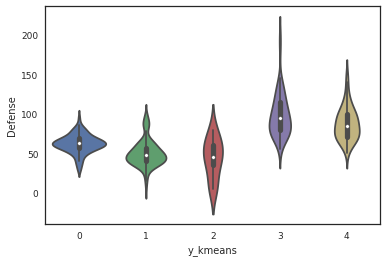

In [26]:
sns.violinplot(x='y_kmeans', y='Defense', data=dataset)
plt.show()

In [27]:
dataset.sort_values('Defense', axis=0, ascending=False).head(10)

,Unnamed: 0,Name,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Color,Height_m,Weight_kg,Body_Style,y_kmeans
196,196,pokemon197,580,80,100,200,50,100,50,Brown,1.70,230.0,bipedal_tailless,3
366,366,pokemon367,514,95,117,184,44,46,28,Blue,2.01,505.0,quadruped,3
198,198,pokemon199,580,80,75,150,75,150,50,Grey,1.91,205.0,bipedal_tailless,4
298,298,pokemon299,483,58,50,145,95,105,30,Yellow,1.70,76.5,head_base,3
200,200,pokemon201,670,100,150,140,100,90,90,Red,3.51,950.0,bipedal_tailed,4
168,168,pokemon169,470,70,85,140,85,70,20,Brown,0.51,80.4,quadruped,3
155,155,pokemon156,375,30,45,135,45,90,30,Grey,0.99,97.0,bipedal_tailless,3
245,245,pokemon246,525,45,100,135,65,135,45,Black,2.21,106.6,head_arms,3
246,246,pokemon247,580,75,75,130,75,130,95,Yellow,0.30,0.3,bipedal_tailed,4
282,282,pokemon283,515,85,135,130,60,80,25,Blue,1.70,260.0,several_limbs,3


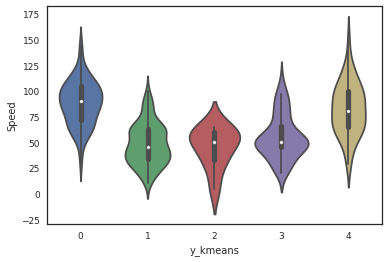

In [28]:
sns.violinplot(x='y_kmeans', y='Speed', data=dataset)
plt.show()

In [29]:
dataset.sort_values('Speed', axis=0, ascending=False).head(15)

,Unnamed: 0,Name,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Color,Height_m,Weight_kg,Body_Style,y_kmeans
201,201,pokemon202,600,50,150,50,150,50,150,Red,1.70,60.8,bipedal_tailless,4
331,331,pokemon332,495,80,70,40,100,60,145,Red,0.79,25.3,head_arms,0
50,50,pokemon51,480,60,50,70,80,80,140,Red,1.19,66.6,head_only,0
74,74,pokemon75,525,65,65,60,110,95,130,Yellow,0.79,24.5,quadruped,0
80,80,pokemon81,680,106,110,90,154,90,130,Purple,2.01,122.0,bipedal_tailed,4
253,253,pokemon254,600,70,90,90,135,90,125,Black,1.50,50.5,bipedal_tailless,4
135,135,pokemon136,530,70,85,65,105,85,120,Green,1.70,52.2,bipedal_tailed,0
35,35,pokemon36,500,55,50,45,135,95,120,Brown,1.50,48.0,bipedal_tailless,0
255,255,pokemon256,720,120,120,120,120,120,120,Grey,3.20,320.0,quadruped,4
22,22,pokemon23,405,35,80,50,50,70,120,Brown,0.71,33.3,multiple_bodies,0


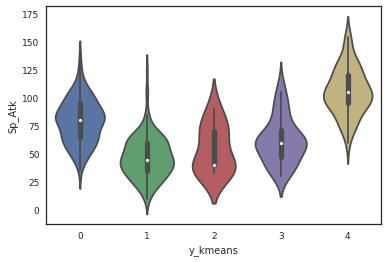

In [31]:
sns.violinplot(x='y_kmeans', y='Sp_Atk', data=dataset)
plt.show()

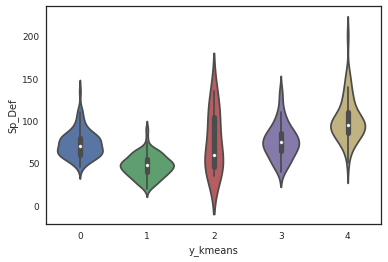

In [32]:
sns.violinplot(x='y_kmeans', y='Sp_Def', data=dataset)
plt.show()

In [34]:
dataset.sort_values('Sp_Def', axis=0, ascending=False).head(10)

,Unnamed: 0,Name,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Color,Height_m,Weight_kg,Body_Style,y_kmeans
197,197,pokemon198,580,80,50,100,100,200,50,Blue,1.80,175.0,bipedal_tailless,4
348,348,pokemon349,552,78,65,68,112,154,75,White,1.09,10.0,head_arms,4
364,364,pokemon365,600,90,100,70,110,150,80,Purple,2.01,150.5,bipedal_tailed,4
198,198,pokemon199,580,80,75,150,75,150,50,Grey,1.91,205.0,bipedal_tailless,4
199,199,pokemon200,670,100,100,90,150,140,90,Blue,4.50,352.0,with_fins,4
129,129,pokemon130,540,255,10,10,75,135,55,Pink,1.50,46.8,bipedal_tailless,2
329,329,pokemon330,485,70,50,30,95,135,105,Blue,1.09,148.0,head_only,0
245,245,pokemon246,525,45,100,135,65,135,45,Black,2.21,106.6,head_arms,3
250,250,pokemon251,600,120,70,120,75,130,85,Yellow,1.50,85.6,serpentine_body,4
106,106,pokemon107,525,95,65,110,60,130,65,Black,0.99,27.0,quadruped,4


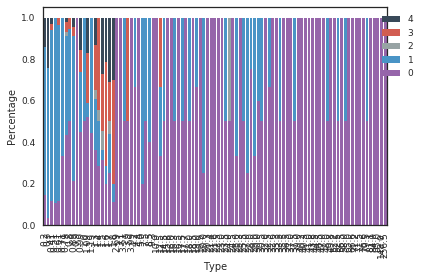

In [38]:
# Clusters by Height_m，Weight_kg

#Get counts by type and cluster
#We need to merge the two columns Type 1 and Type 2 together the type can appear in either column
data_pct_1 = dataset.groupby(['Height_m', 'y_kmeans'])['Name'].count().to_frame().reset_index()
data_pct_1.columns = ['Type', 'y_kmeans', 'count_1']

data_pct_2 = dataset.groupby(['Weight_kg', 'y_kmeans'])['Name'].count().to_frame().reset_index()
data_pct_2.columns = ['Type', 'y_kmeans', 'count_2']

data_pct = data_pct_1.merge(data_pct_2, how='outer',
                            left_on=['Type', 'y_kmeans'],
                            right_on=['Type', 'y_kmeans'])

data_pct.fillna(0, inplace=True)
data_pct['count'] = data_pct['count_1'] + data_pct['count_2']

#Get counts by type
data_pct_Total = data_pct.groupby(['Type']).sum()['count'].reset_index()
data_pct_Total.columns = ['Type', 'count_total']

#Merge two dataframes and create percentage column
data_pct = data_pct.merge(right=data_pct_Total, 
                                    how='inner',
                                    left_on='Type',
                                    right_on='Type')

data_pct['pct'] = data_pct['count'] / data_pct['count_total']

#Create Graph
sns.barplot(x='Type', y='pct', data=data_pct, estimator=sum, ci=None, color='#34495e', label='4')
sns.barplot(x='Type', y='pct', data=data_pct[data_pct['y_kmeans'] <= 3], 
            estimator=sum, ci=None, color='#e74c3c', label='3') 
sns.barplot(x='Type', y='pct', data=data_pct[data_pct['y_kmeans'] <= 2], 
            estimator=sum, ci=None, color='#95a5a6', label='2') 
sns.barplot(x='Type', y='pct', data=data_pct[data_pct['y_kmeans'] <= 1], 
            estimator=sum, ci=None, color='#3498db', label='1') 
sns.barplot(x='Type', y='pct', data=data_pct[data_pct['y_kmeans'] == 0], 
            estimator=sum, ci=None, color='#9b59b6', label='0') 

plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

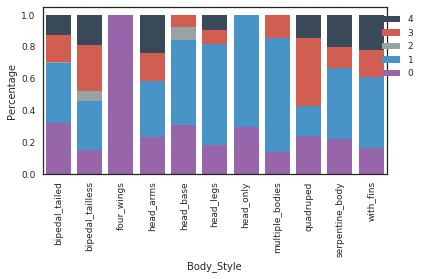

In [40]:
#Clusters by Body_Style


#Get counts by body_Style and cluster
#We need to merge the two columns Type 1 and Type 2 together the type can appear in either column
data_pct = dataset.groupby(['Body_Style', 'y_kmeans'])['Name'].count().to_frame().reset_index()
data_pct.columns = ['Body_Style', 'y_kmeans', 'count']

#Get counts by type
data_pct_Total = data_pct.groupby(['Body_Style']).sum()['count'].reset_index()
data_pct_Total.columns = ['Body_Style', 'count_total']

#Merge two dataframes and create percentage column
data_pct = data_pct.merge(right=data_pct_Total, 
                                    how='inner',
                                    left_on='Body_Style',
                                    right_on='Body_Style')

data_pct['pct'] = data_pct['count'] / data_pct['count_total']

#Create Graph
sns.barplot(x='Body_Style', y='pct', data=data_pct, estimator=sum, ci=None, color='#34495e', label='4')
sns.barplot(x='Body_Style', y='pct', data=data_pct[data_pct['y_kmeans'] <= 3], 
            estimator=sum, ci=None, color='#e74c3c', label='3') 
sns.barplot(x='Body_Style', y='pct', data=data_pct[data_pct['y_kmeans'] <= 2], 
            estimator=sum, ci=None, color='#95a5a6', label='2') 
sns.barplot(x='Body_Style', y='pct', data=data_pct[data_pct['y_kmeans'] <= 1], 
            estimator=sum, ci=None, color='#3498db', label='1') 
sns.barplot(x='Body_Style', y='pct', data=data_pct[data_pct['y_kmeans'] == 0], 
            estimator=sum, ci=None, color='#9b59b6', label='0') 

plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()